In [26]:
# load libraries
library(xts)
library(vars)
library(readr)
library(zoo)
library(ggplot2)
library(ggthemes)
library(mFilter)
library(readxl)
library(urca)
library(seasonal)
library(tsDyn)
library(egcm)
library(dynlm)
library(cowplot)
library(aTSA)

In [27]:
#Load data from excel file
data <- read_excel("Z:/Capstone/ExchangeRateCZK/Data/Vysledne/CapstoneData_Final.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric","numeric", "numeric"))
data

Period,EURCZK,N_GDP,R_GDP,G,NA_R_X,NA_R_M,P_X,P_M,BOP_CAB,...,BOP_BSI,CPI_CZ,CPI_EUROZONE,RGDP_per_capita_CZ,RGDP_per_capita_EUROZONE,CONV,NA_R_M_EUROZONE,PROD_EU,PROD_CZ,Interventions
1998-06-30,36.533,546405,742212,173228,237701,234836,1.0200546,0.9970235,-88.4,...,4944.6,68.0,73.47,22111.3,34945.3,0.6327403,562892.1,0.8865886,0.6569186,141.084
1998-09-30,35.185,560358,754156,159309,235011,232948,0.9685164,0.9555952,-4458.9,...,4271.2,69.2,73.47,22104.6,35113.8,0.6295132,553454.1,0.8864077,0.6621044,402.934
1998-12-31,35.021,564821,761134,195110,231831,241305,0.9282969,0.9504279,-26353.2,...,3752.9,68.8,73.49,22126.4,35106.1,0.6302722,589293.8,0.8846722,0.6628448,69.825
1999-03-31,38.420,506463,691767,166271,216313,218946,0.9702561,0.9777890,-12216.3,...,3834.9,69.3,73.85,22157.0,35486.0,0.6243871,575374.5,0.8891915,0.6695752,35.451
1999-06-30,36.640,566822,749212,176442,251842,249827,0.9740830,0.9812790,-6621.6,...,7054.7,69.4,74.16,22252.3,35668.7,0.6238607,605335.5,0.8906734,0.6769549,129.194
1999-09-30,35.650,577201,762930,167468,252863,239290,0.9834891,0.9989343,-5011.6,...,4949.1,70.0,74.43,22462.3,36046.8,0.6231427,597653.1,0.8955604,0.6856873,71.687
1999-12-31,36.130,602497,782573,198814,258965,269597,1.0020698,1.0233682,-26746.9,...,4568.0,70.4,74.83,22709.0,36422.4,0.6234899,646788.7,0.9015415,0.6916232,1209.700
2000-03-31,35.625,540690,723434,164574,255506,251383,0.9879925,1.0394299,-17280.2,...,3328.7,71.8,75.37,23028.6,36857.2,0.6248060,648057.8,0.9060219,0.7061118,431.000
2000-06-30,35.845,598350,777141,179101,278135,276202,1.0279001,1.0661219,-19372.8,...,4437.0,72.3,75.80,23268.5,37157.0,0.6262212,676686.9,0.9084628,0.7141935,69.300
2000-09-30,35.470,612979,794715,168252,280647,274785,1.0377770,1.0774678,-24568.9,...,3881.0,72.8,76.26,23576.4,37325.4,0.6316449,668238.5,0.9094878,0.7220262,-267.000


# Data preparation

Data is transformed in order to be used in the models. The transformations are seasonal adjustments, hp-filtering and logarithms. Also, some variables are calculated from other variables.

In [28]:
# seasonal adjustment of Real GDP
data$R_GDP_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "R_GDP"]), "R_GDP_SA"] <- as.vector(seas(ts(data[, "R_GDP"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])
# HP filter of Real GDP
data$R_GDP_POT = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "R_GDP"]), "RGDP_POT"] <- hpfilter(as.vector(data[!is.na(data[, "R_GDP_SA"]), "R_GDP_SA"]), freq=1600)$trend

# Calculate productivity differential of the Czech Republic to Eurozone
data$DPROD = data$PROD_CZ/data$PROD_EU

# HP filter of productivity differential
data$DPROD_HP = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "DPROD"]), "DPROD_HP"] <- hpfilter(as.vector(data[!is.na(data[, "DPROD"]), "DPROD"]), freq=1600)$trend

# calculate real exchange rate
data$ER_R_CPI = data$EURCZK*(data$CPI_EUROZONE/data$CPI_CZ)

# calculate government spending to gdp ratio
data$GOV_GDP_ratio = data$G/data$R_GDP

# seasonal adjustment of government spending to gdp ratio
data$GOV_GDP_ratio_SA= rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "GOV_GDP_ratio"]), "GOV_GDP_ratio_SA"] <- as.vector(seas(ts(data[, "GOV_GDP_ratio"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])

# HP filter of government spending to gdp ratio
data$GOV_GDP_ratio_SA_HP = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "GOV_GDP_ratio_SA"]), "GOV_GDP_ratio_SA_HP"] <- hpfilter(as.vector(data[!is.na(data[, "GOV_GDP_ratio_SA"]), "GOV_GDP_ratio_SA"]), freq=1600)$trend

# seasonal adjustment of Eurozone real imports (Foreign demand proxy)
data$NA_R_M_EUROZONE_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "NA_R_M_EUROZONE"]), "NA_R_M_EUROZONE_SA"] <- as.vector(seas(ts(data[, "NA_R_M_EUROZONE"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])
# HP filter of Eurozone real imports (Foreign demand proxy)
data[!is.na(data[, "NA_R_M_EUROZONE"]), "NA_R_M_EUROZONE_HP"] = hpfilter(as.vector(data[!is.na(data[, "NA_R_M_EUROZONE_SA"]), "NA_R_M_EUROZONE_SA"]), freq=1600)$trend

# seasonal adjustment of Real exports and imports
data$NA_R_X_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "NA_R_X"]), "NA_R_X_SA"] <- as.vector(seas(ts(data[, "NA_R_X"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])

data$NA_R_M_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "NA_R_M"]), "NA_R_M_SA"] <- as.vector(seas(ts(data[, "NA_R_M"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])

# seasonal adjustment of current account to gdp ratio
data$BOP_CAB_GDP_ratio_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "BOP_CAB_GDP_ratio"]), "BOP_CAB_GDP_ratio_SA"] <- as.vector(seas(ts(data[, "BOP_CAB_GDP_ratio"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])

# seasonal adjustment of BPI
data$BOP_BPI_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "BOP_BPI"]), "BOP_BPI_SA"] <- as.vector(seas(ts(data[, "BOP_BPI"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])
# HP filter of BSI
data[!is.na(data[, "BOP_BPI"]), "BOP_BPI_HP"] <- hpfilter(as.vector(data[!is.na(data[, "BOP_BPI_SA"]), "BOP_BPI_SA"]), freq=1600)$trend

# seasonal adjustment of BSI
data$BOP_BSI_SA = rep(as.numeric(NA), nrow(data))
data[!is.na(data[, "BOP_BSI"]), "BOP_BSI_SA"] <- as.vector(seas(ts(data[, "BOP_BSI"], frequency=4,  start=c(1998,2)), x11 = "", estimate.maxiter=10000)$data[,"seasonaladj"])
# HP filter of BSI
data[!is.na(data[, "BOP_BSI"]), "BOP_BSI_HP"] <- hpfilter(as.vector(data[!is.na(data[, "BOP_BSI_SA"]), "BOP_BSI_SA"]), freq=1600)$trend


# calculate log of variables
data$L_NA_R_X_SA = log(data$NA_R_X_SA)
data$L_NA_R_M_SA = log(data$NA_R_M_SA )
data$L_ER_R_CPI = log(data$ER_R_CPI)
data$L_R_GDP_SA = log(data$R_GDP_SA)
data$L_DPROD= log(data$DPROD)
data$L_CONV= log(data$CONV)
data$L_NA_R_M_EUROZONE_SA = log(data$NA_R_M_EUROZONE_SA)
data$L_GOV_GDP_ratio_SA = log(data$GOV_GDP_ratio_SA)

# create dummy variables to eliminate exogenous hocks
data$D_2004Q2 = 1L * (as.Date(data$Period, tz = "UTC") == as.Date("2004-06-30" ,format = "%Y-%m-%d", tz = "UTC"))
data$D_2008Q4 = 1L * (as.Date(data$Period, tz = "UTC") == as.Date("2008-12-31" ,format = "%Y-%m-%d", tz = "UTC"))
data$D_2020Q2 = 1L * (as.Date(data$Period, tz = "UTC") == as.Date("2020-06-30" ,format = "%Y-%m-%d", tz = "UTC"))
data$D_2020Q3 = 1L * (as.Date(data$Period, tz = "UTC") == as.Date("2020-09-30" ,format = "%Y-%m-%d", tz = "UTC"))
data$D_2009Q1 = 1L * (as.Date(data$Period, tz = "UTC") == as.Date("2009-03-31" ,format = "%Y-%m-%d", tz = "UTC"))

dumvars = data.matrix(data[,c("D_2004Q2", "D_2008Q4", "D_2020Q2", "D_2020Q3", "D_2009Q1")])

# Unit root tests

The ADF unit root test is used to indicate the integration order of the variables. All variables are integrated of order I(1) according to the test.

In [30]:
#1) lag length function - function to choose optimal lag based on Schwarz information criterion for ADF test
#  functionality needed because selectlags argument in ur.df function is not working with arguments AIC or BIC

lag_length_opt_SC <- function(series, lag.max){
 names <- c("lag", "SC")
 lag_selection_er <- as.data.frame(rbind(rep(NA,length(names))))
 colnames(lag_selection_er) <- names
 for(t in 0:lag.max){
 if(t==0){
 fit <- dynlm(diff(ts(series)) ~ L(ts(series),1), start = start((dynlm(diff(ts(series)) ~ L(diff(ts(series)),
c(1:lag.max)) + L(ts(series),1)))$residuals)[1])
 }
 else {
 fit <- dynlm(diff(ts(series)) ~ L(diff(ts(series)), c(1:t)) + L(ts(series),1), start =
start((dynlm(diff(ts(series)) ~ L(diff(ts(series)), c(1:lag.max)) + L(ts(series),1)))$residuals)[1])
 }

 lag_selection_er[t+1,"lag"] <- t
 lag_selection_er[t+1,"SC"] <- -2*logLik(fit)[1]/length(resid(fit))+(((length(coef(fit)))*log(length(resid(fit))))/length(resid(fit)))
 }
    
lag_opt <- lag_selection_er[lag_selection_er$SC == min(lag_selection_er$SC),]["lag"]

 return (unlist(lag_opt))
}


In [5]:
print("Variable: Logarithm of the EURCZK real exchange rate (CPI deflated), label: L_ER_R_CPI")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_ER_R_CPI, type = "drift", lags = lag_length_opt_SC(data$L_ER_R_CPI, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_ER_R_CPI, type = "drift", lags = lag_length_opt_SC(data$L_ER_R_CPI, 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_ER_R_CPI), type = "drift", lags = lag_length_opt_SC(data$L_ER_R_CPI, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_ER_R_CPI), type = "drift", lags = lag_length_opt_SC(data$L_ER_R_CPI, 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that the real exchange rate, L_ER_R_CPI is integrated of order I(1) on 5% confidence level

[1] "Variable: Logarithm of the EURCZK real exchange rate (CPI deflated), label: L_ER_R_CPI"
[1] "The ADF test statistic for level is equal to:"
[1] -1.893927
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -9.547338
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [16]:
print("Variable: Logarithm of CZ and Eurozone labour productivity ratio, label: L_DPROD")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_DPROD, type = "drift", lags = lag_length_opt_SC(data$L_DPROD, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_DPROD, type = "drift", lags = lag_length_opt_SC(data$L_DPROD, 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_DPROD), type = "drift", lags = lag_length_opt_SC(data$L_DPROD, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_DPROD), type = "drift", lags = lag_length_opt_SC(data$L_DPROD, 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that labour productivity differential, L_DPROD is integrated of order I(1) on 5% confidence level

[1] "Variable: Logarithm of CZ and Eurozone labour productivity ratio, label: L_DPROD"
[1] "The ADF test statistic for level is equal to:"
[1] -2.465466
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -10.05755
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [17]:
print("Variable: Logarithm of real government spending to real gdp ratio, seasonally adjusted, label: L_GOV_GDP_ratio_SA")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_GOV_GDP_ratio_SA, type = "drift", lags = lag_length_opt_SC(data$L_GOV_GDP_ratio_SA, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_GOV_GDP_ratio_SA, type = "drift", lags = lag_length_opt_SC(data$L_GOV_GDP_ratio_SA, 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_GOV_GDP_ratio_SA), type = "drift", lags = lag_length_opt_SC(data$L_GOV_GDP_ratio_SA, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_GOV_GDP_ratio_SA), type = "drift", lags = lag_length_opt_SC(data$L_GOV_GDP_ratio_SA, 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that Government spending, L_GOV_GDP_ratio_SA is integrated of order I(1) on 5% confidence level

[1] "Variable: Logarithm of real government spending to real gdp ratio, seasonally adjusted, label: L_GOV_GDP_ratio_SA"
[1] "The ADF test statistic for level is equal to:"
[1] -1.628899
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -4.341443
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [19]:
print("Variable: Czech real exports in 2015 prices, seasonally adjusted, label: L_NA_R_X_SA")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_NA_R_X_SA, type = "drift", lags = lag_length_opt_SC(data$L_NA_R_X_SA, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_NA_R_X_SA, type = "drift", lags = lag_length_opt_SC(data$L_NA_R_X_SA, 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_NA_R_X_SA), type = "drift", lags = lag_length_opt_SC(data$L_NA_R_X_SA, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_NA_R_X_SA), type = "drift", lags = lag_length_opt_SC(data$L_NA_R_X_SA, 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that real exports, L_NA_R_X_SA is integrated of order I(1) on 5% confidence level

[1] "Variable: Czech real exports in 2015 prices, seasonally adjusted, label: L_NA_R_X_SA"
[1] "The ADF test statistic for level is equal to:"
[1] -1.645058
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -9.913741
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [20]:
print("Variable: Czech real imports in 2015 prices, seasonally adjusted, label: L_NA_R_M_SA")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_NA_R_M_SA, type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_SA, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_NA_R_M_SA, type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_SA, 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_NA_R_M_SA), type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_SA, 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_NA_R_M_SA), type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_SA, 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that real imports, L_NA_R_M_SA is integrated of order I(1) on 5% confidence level

[1] "Variable: Czech real imports in 2015 prices, seasonally adjusted, label: L_NA_R_M_SA"
[1] "The ADF test statistic for level is equal to:"
[1] -1.93335
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -9.464507
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [21]:
print("Variable: Eurozone real exports in 2015 prices (foreign demand proxy), seasonally adjusted, label: L_NA_R_M_EUROZONE_SA ")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_NA_R_M_EUROZONE_SA , type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_EUROZONE_SA , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_NA_R_M_EUROZONE_SA , type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_EUROZONE_SA , 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_NA_R_M_EUROZONE_SA ), type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_EUROZONE_SA , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_NA_R_M_EUROZONE_SA ), type = "drift", lags = lag_length_opt_SC(data$L_NA_R_M_EUROZONE_SA , 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that real imports of Eurozone , L_NA_R_M_EUROZONE_SA is integrated of order I(1) on 5% confidence level

[1] "Variable: Eurozone real exports in 2015 prices (foreign demand proxy), seasonally adjusted, label: L_NA_R_M_EUROZONE_SA "
[1] "The ADF test statistic for level is equal to:"
[1] -1.808608
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -9.902318
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [22]:
print("Variable: Czech real GDP (in 2015 prices), seasonally adjusted, label: L_R_GDP_SA ")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_R_GDP_SA , type = "drift", lags = lag_length_opt_SC(data$L_R_GDP_SA , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_R_GDP_SA , type = "drift", lags = lag_length_opt_SC(data$L_R_GDP_SA , 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_R_GDP_SA ), type = "drift", lags = lag_length_opt_SC(data$L_R_GDP_SA , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_R_GDP_SA), type = "drift", lags = lag_length_opt_SC(data$L_R_GDP_SA , 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that Czech real GDP L_R_GDP_SA is integrated of order I(1) on 5% confidence level

[1] "Variable: Czech real GDP (in 2015 prices), seasonally adjusted, label: L_R_GDP_SA "
[1] "The ADF test statistic for level is equal to:"
[1] -1.506005
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -9.324292
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [24]:
print("Variable: Ratio of Czech and Eurozone real GDP per capita in PPP, label: L_CONV ")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_CONV , type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_CONV , type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_CONV ), type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_CONV), type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that real GDP per capita differential, L_CONV is integrated of order I(1) on 5% confidence level

[1] "Variable: Czech real GDP (in 2015 prices), seasonally adjusted, label: L_CONV "
[1] "The ADF test statistic for level is equal to:"
[1] -0.8706511
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -10.91147
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [25]:
print("Variable: Ratio of Czech and Eurozone real GDP per capita in PPP, label: L_CONV ")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$L_CONV , type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$L_CONV , type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$L_CONV ), type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$L_CONV), type = "drift", lags = lag_length_opt_SC(data$L_CONV , 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that real GDP per capita differential, L_CONV is integrated of order I(1) on 5% confidence level

[1] "Variable: Ratio of Czech and Eurozone real GDP per capita in PPP, label: L_CONV "
[1] "The ADF test statistic for level is equal to:"
[1] -0.8706511
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -10.91147
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


In [31]:
print("Variable: Market transactions of CNB (mln EUR), label: Interventions")
print("The ADF test statistic for level is equal to:")
print(ur.df(data$Interventions , type = "drift", lags = lag_length_opt_SC(data$Interventions , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for level are equal to:")
print(ur.df(data$Interventions , type = "drift", lags = lag_length_opt_SC(data$Interventions , 10), selectlags = c("Fixed"))@cval[1,])

print("The ADF test statistic for first difference is equal to:")
print(ur.df(diff(data$Interventions ), type = "drift", lags = lag_length_opt_SC(data$Interventions , 10), selectlags = c("Fixed"))@teststat[1])
print("The ADF test critical values for first difference are equal to:")
print(ur.df(diff(data$Interventions), type = "drift", lags = lag_length_opt_SC(data$Interventions , 10), selectlags = c("Fixed"))@cval[1,])

# The test indicates that Intečrventions is integrated of order I(0) on 5% confidence level

[1] "Variable: Market transactions of CNB (mln EUR), label: Interventions"
[1] "The ADF test statistic for level is equal to:"
[1] -7.739154
[1] "The ADF test critical values for level are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 
[1] "The ADF test statistic for first difference is equal to:"
[1] -15.12014
[1] "The ADF test critical values for first difference are equal to:"
 1pct  5pct 10pct 
-3.51 -2.89 -2.58 


# The BEER model with interventions

Data were chosen using the backward elimination procedure by removing insignificant variables and judgement. 
The final model is presented here.

The endogenous variables are:
1. CPI deflated EURCZK, L_ER_R_CPI
2. Labour productivity differential of the Czech Republic over Eurozone, L_R_GDP_SA 
3. Ratio of Czech real government spending to Czech real GDP, L_GOV_GDP_ratio_SA

All varialbes expressed in logarithms.

The exogenous variables are:
1. Volume of CNB spot transactions (Spot_Transactions) and interventions (Interventions) in EUR mln.
2. Dummy variables used to account for the COVID periods (2020Q2, D_2020Q3)

In [32]:
# First, the VAR for the variables in levels is run in order to choose the order of the VEC model.
# The information criteria suggest using 1-3 lags in the VARX (VAR with exogenous variables) model.
# The VEC model has the number of lags in VAR model minus one.
# The chosen VEC model has 3 lags because choosing less lags resulted in error term autocorrelation not being rejected

VARselect(data[,c("L_ER_R_CPI", "L_DPROD")], lag.max = 10, type = "const",
          exogen = data[,c("Interventions", "D_2020Q2", "D_2020Q3")])

,1,2,3,4,5,6,7,8,9,10
AIC(n),-1.729609e+01,-1.724426e+01,-1.719499e+01,-1.713264e+01,-1.710182e+01,-1.704162e+01,-1.695272e+01,-1.694897e+01,-1.692684e+01,-1.690377e+01
HQ(n),-1.715377e+01,-1.705449e+01,-1.695778e+01,-1.684799e+01,-1.676974e+01,-1.666209e+01,-1.652574e+01,-1.647456e+01,-1.640499e+01,-1.633448e+01
SC(n),-1.694136e+01,-1.677128e+01,-1.660377e+01,-1.642317e+01,-1.627411e+01,-1.609566e+01,-1.588852e+01,-1.576653e+01,-1.562615e+01,-1.548484e+01
FPE(n),3.080625e-08,3.246944e-08,3.415162e-08,3.641641e-08,3.765447e-08,4.013192e-08,4.406349e-08,4.448412e-08,4.580475e-08,4.728191e-08


In [36]:
# The Johansen procedure, including test for cointegration and VECM estimation
# The trace statistic indicates the presence of one cointegration vector.

# The null hypothesis is that there are at most x (x = 0,1,2) cointegration vectors
# the row with hypothesis r, the number of cointegrating vectors  = 0 has the test statistic 27.89,
# higher than the critical value on 5pct significance level of 22 so that the null of no cointegration is rejected)

cajo_BEER_model_with_interventions = ca.jo(data[,c("L_ER_R_CPI", "L_DPROD", "L_GOV_GDP_ratio_SA")],ecdet="const",type="eigen",K=4,spec="transitory",
                dumvar =  data[,c("Interventions", "D_2020Q2", "D_2020Q3")])

summary(cajo_BEER_model_with_interventions)



###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  2.742940e-01  1.127870e-01  4.991184e-02 -2.161577e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.45  7.52  9.24 12.97
r <= 1 | 10.41 13.75 15.67 20.20
r = 0  | 27.89 19.77 22.00 26.81

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                      L_ER_R_CPI.l1 L_DPROD.l1 L_GOV_GDP_ratio_SA.l1  constant
L_ER_R_CPI.l1             1.0000000   1.000000             1.0000000  1.000000
L_DPROD.l1                1.4491908  -2.159108             1.7320822  2.996224
L_GOV_GDP_ratio_SA.l1     0.5365669  -4.119838             0.4771181  0.727872
constant                 -2.3256290 -10.011287            -2.5138213 -1.929309

Weights W:
(This is the loading matrix)

                     L_ER_R_

In [37]:
# Another function is used to reveal the t-tests of individual variables
# The loading coefficient of the real exchange rate is negative and is significant on 10% confidence level.
# As expected, the real exchange rate adjusts to approach the long run relationship.
# According to the model, the productivity differential also adjusts to approach the long run relationship.

# Interventions and spot transactions are not statistically significant

BEER_model_with_interventions = VECM(data[,c("L_ER_R_CPI", "L_DPROD", "L_GOV_GDP_ratio_SA")], lag = 3, r = 1, include = c("none"),
beta = NULL, estim = c("ML"), LRinclude = c("const"), exogen = data[,c( "Interventions", "D_2020Q2", "D_2020Q3")])
summary(BEER_model_with_interventions)

#############
###Model VECM 
#############
Full sample size: 91 	End sample size: 87
Number of variables: 3 	Number of estimated slope parameters 39
AIC -2156.76 	BIC -2055.658 	SSR 0.09453582
Cointegrating vector (estimated by ML):
   L_ER_R_CPI  L_DPROD L_GOV_GDP_ratio_SA     const
r1          1 1.449191          0.5365669 -2.325629


                            ECT                L_ER_R_CPI -1      
Equation L_ER_R_CPI         -0.1690(0.0659)*   0.0937(0.1204)     
Equation L_DPROD            0.0614(0.0131)***  0.0003(0.0240)     
Equation L_GOV_GDP_ratio_SA -0.0852(0.0502).   -0.0065(0.0919)    
                            L_DPROD -1          L_GOV_GDP_ratio_SA -1
Equation L_ER_R_CPI         0.7217(0.4956)      0.0128(0.1508)       
Equation L_DPROD            -0.1249(0.0989)     -0.0779(0.0301)*     
Equation L_GOV_GDP_ratio_SA 0.2025(0.3780)      -0.2961(0.1151)*     
                            L_ER_R_CPI -2       L_DPROD -2         
Equation L_ER_R_CPI         -0.0564(0.1110)  

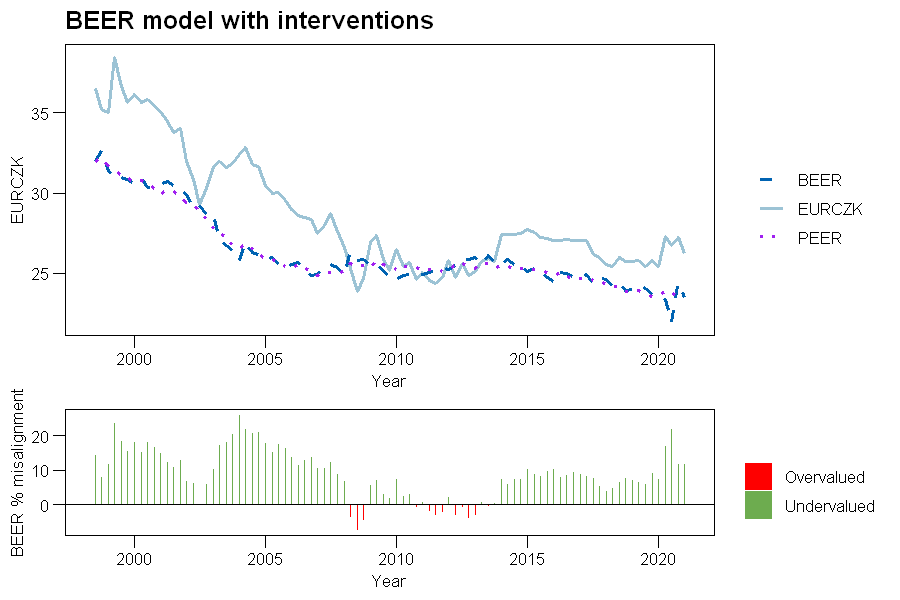

In [35]:
# Plot of the BEER model results
# The fitted values of the long run regression
data$EURCZK_fitted = exp(2.3256290 - 1.4491908*data$L_DPROD - 0.5365669*data$L_GOV_GDP_ratio_SA)*data$CPI_CZ/data$CPI_EUROZONE
# The fitted values of the long run regression conditional on variables being at their trend (equilibrium) level
data$EURCZK_fitted_permanent = exp(2.3256290 - 1.4491908*log(data$DPROD_HP) - 0.5365669*log(data$GOV_GDP_ratio_SA_HP))*data$CPI_CZ/data$CPI_EUROZONE
# The % difference between the actual and equilibrium value of the exchagne rate
data$EURCZK_misalignment = (data$EURCZK/data$EURCZK_fitted-1)*100
data$misalignment_sign = ifelse(data$EURCZK_misalignment < 0, "Overvalued", "Undervalued")
## set plot size:
options(repr.plot.width=7.5, repr.plot.height=5)

# Plot of actual and fitted values
plot1 = ggplot(data=data[,c("Period", "EURCZK", "EURCZK_fitted", "EURCZK_fitted_permanent")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c("#0063B2FF", "#9CC3D5FF", "purple"))+
 scale_linetype_manual(values = c("dashed", "solid", "dotted"))+
  geom_line(size=1.1, aes(color = "EURCZK", y = EURCZK, linetype="EURCZK"))+
  geom_line(size=1.1, aes(color = "BEER", y = EURCZK_fitted, linetype="BEER"))+
  geom_line(size=1.1, aes(color = "PEER", y = EURCZK_fitted_permanent, linetype="PEER"))+
  xlab("Year")+
  ylab("EURCZK")+
  ggtitle("BEER model with interventions")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "right",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "", linetype = "")

plot2 = ggplot(data=data[,c("Period", "EURCZK_misalignment", "misalignment_sign")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c( "#FE0000FF", "#6DAC4FFF"))+
 scale_fill_manual(values = c("#FE0000FF", "#6DAC4FFF"))+
geom_bar(aes(y = EURCZK_misalignment, colour = misalignment_sign, fill = misalignment_sign) , width=.8, stat="identity") + 
 geom_hline(yintercept=0)+
  xlab("Year")+
  ylab("BEER % misalignment")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "right",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "", fill="")

plot_grid(plot1, plot2, align = "v", nrow = 2, rel_heights = c(2/3, 1/3))


# Residual diagnosis

The autocorrelation and normality of the error term is tested in the VEC model

Multivariate Breusch-Godfrey LM test for serial correlation is used to test the autocorrelation.
The Breusch-Godfrey test is preffered because R can only perform residual tests on VAR object. 
However, the conventional tests assume stationary VAR. Only Breusch-Godfrey test is analogous to the stationary VAR case.

Bruggerman et al. (2004) shows that tests for VAR with cointegrated variables need to be modified:
"The Breush-Godfrey LM test for residual AC based on an auxiliary VECM analogousely to the stationary VAR case,
has the same asymptotic chi-squared null distribution as in the stationary case.
The portmanteau statistc for residual AC has a different approximate chi-squared distribution than for stationary VARs
This result also implies that applying the usual (stationary) portmanteau test for checking the residuals of a VAR model with
integrated and cointegrated variables has no sound theoretical basis." - Bruggerman et al. (2004)

Jarque-Bera test is used to test multivariate normality of the error term.

In [45]:
# The null hypothesis: No serial correlation up to lag 4
# The results indicate no serial correlation up to lag 4. The null hypothesis is not rejected at 5% significance level.
# It is assumed that the model is correctly specified.

# # Multivariate LM test for serial correlation
print(serial.test(vec2var(cajo_BEER_model_with_interventions), lags.bg = 1, type = c("BG") )$serial)
print(serial.test(vec2var(cajo_BEER_model_with_interventions), lags.bg = 2, type = c("BG") )$serial)
print(serial.test(vec2var(cajo_BEER_model_with_interventions), lags.bg = 3, type = c("BG") )$serial)
print(serial.test(vec2var(cajo_BEER_model_with_interventions), lags.bg = 4, type = c("BG") )$serial)


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(cajo_BEER_model_with_interventions)
Chi-squared = 7.94, df = 9, p-value = 0.5402


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(cajo_BEER_model_with_interventions)
Chi-squared = 19.881, df = 18, p-value = 0.3395


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(cajo_BEER_model_with_interventions)
Chi-squared = 32.784, df = 27, p-value = 0.2043


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(cajo_BEER_model_with_interventions)
Chi-squared = 48.446, df = 36, p-value = 0.08047



In [44]:
# Multivariate normality test
# The null hypothesis: The error term is has multivariate normal distribution
# The results indicate normal distribution of the error term. The null hypothesis is not rejected at 5% significance level.
normality.test(vec2var(cajo_BEER_model_with_interventions))$jb.mul$JB


	JB-Test (multivariate)

data:  Residuals of VAR object vec2var(cajo_BEER_model_with_interventions)
Chi-squared = 3.0626, df = 6, p-value = 0.8009


# The FEER model

### Real import behavioural function

The real import function is estimated firstly using the Johansen approach and secondly using the Engle-Granger approach.
The endogenous variables are:
1. Czech real imports (in 2015 prices), L_NA_R_M_SA
2. Czech real GDP (in 2015 prices), L_R_GDP_SA and 
3. CPI deflated real exchange rate, L_ER_R_CPI

All varialbes expressed in logarithms. L_NA_R_M_SA and L_R_GDP_SA
were seasonally adjusted in the data preparation step.

The exogenous variables are the dummy variables used to account for exogenous shocks 
- the COVID periods (2020Q2, D_2020Q3), the Global Financial Crisis (2008Q4) 
and 2004Q2 accounts for the accession of the Czech Republic to the European Union (May 2004) that meant a sharp rise of exports and imports

In [6]:
# First, the VAR for the variables in levels is run in order to choose the order of the VEC model.
# The information criteria suggest using 1-8 lags in the VARX (VAR with exogenous variables) model.


# The VEC model has the number of lags in VAR model minus one.
# The chosen VEC model has 1 lag = the minimum number of lags allowed in the ca.jo function.

VARselect(data[,c("L_NA_R_M_SA", "L_R_GDP_SA", "L_ER_R_CPI")], lag.max = 10, type = "const",
          exogen = dumvars[,c("D_2004Q2", "D_2020Q2", "D_2020Q3", "D_2008Q4")])

,1,2,3,4,5,6,7,8,9,10
AIC(n),-2.414356e+01,-2.410874e+01,-2.402541e+01,-2.399292e+01,-2.393963e+01,-2.388826e+01,-2.392319e+01,-2.416143e+01,-2.403479e+01,-2.397539e+01
HQ(n),-2.385891e+01,-2.371735e+01,-2.352728e+01,-2.338805e+01,-2.322801e+01,-2.306990e+01,-2.299809e+01,-2.312958e+01,-2.289620e+01,-2.273006e+01
SC(n),-2.343409e+01,-2.313322e+01,-2.278384e+01,-2.248531e+01,-2.216596e+01,-2.184855e+01,-2.161743e+01,-2.158961e+01,-2.119692e+01,-2.087148e+01
FPE(n),3.276624e-11,3.403360e-11,3.719327e-11,3.874849e-11,4.137406e-11,4.429622e-11,4.374555e-11,3.548650e-11,4.178615e-11,4.642698e-11


In [7]:
# The Johansen procedure, including test for cointegration and VECM estimation
# The trace statistic indicates the presence of one cointegration vector.

# The null hypothesis is that there are at most x (x = 0,1,2) cointegration vectors
# the row with hypothesis r, the number of cointegrating vectors  = 0 has the test statistic 44.68,
# higher than the critical value on 5pct significance level of 34.91 so that the null of no cointegration is rejected)

jcointt = ca.jo(data[,c("L_NA_R_M_SA", "L_R_GDP_SA", "L_ER_R_CPI")],ecdet="const",type="trace",K=2,spec="transitory",
                dumvar = dumvars[,c("D_2004Q2", "D_2020Q2", "D_2020Q3", "D_2008Q4")])
summary(jcointt)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 3.115206e-01 1.370619e-01 3.978357e-02 1.230328e-15

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.61  7.52  9.24 12.97
r <= 1 | 16.73 17.85 19.96 24.60
r = 0  | 49.95 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               L_NA_R_M_SA.l1 L_R_GDP_SA.l1 L_ER_R_CPI.l1   constant
L_NA_R_M_SA.l1       1.000000      1.000000      1.000000  1.0000000
L_R_GDP_SA.l1       -1.985192     -1.664976     -4.028841 -3.7095515
L_ER_R_CPI.l1        1.057715      0.931819     -1.844500  0.9414383
constant            10.748044      6.585546     48.636637 34.6772581

Weights W:
(This is the loading matrix)

              L_NA_R_M_SA.l1 L_R_GDP_SA.l1 L_ER_R_CPI.l1      constant
L_NA_R_M_SA.d     0.07166637  -0.0820

In [5]:
# Engle-Granger approach
# Estimate a static regression using OLS
ols_import = lm(L_NA_R_M_SA ~ L_R_GDP_SA + L_ER_R_CPI, data = data)
coef(ols_import)

(Intercept)  L_R_GDP_SA  L_ER_R_CPI 
-18.3714225   2.3609959  -0.3004158

In [6]:
# Choose optimal lag for ADF test on static regression residuals
# The optimal lag selection for the ADF test is zero

lagopt_import <- lag_length_opt_SC( resid(ols_import), lag.max = 10)
lagopt_import

lag 
  0

In [9]:
# Engle-Grangewr cointegration test
# 1 lag was chosen for the test because R function coint.test does not allow select 0 lags
# The ADF statistic is equal to -9.54 and the null hypothesis of no cointegration is rejected on 5% confidence level
coint.test(y =  data$L_NA_R_M_SA, X = as.matrix(data[,c("L_R_GDP_SA", "L_ER_R_CPI")]), d = 1, nlag = 1, output = TRUE)

Response: diff(data$L_NA_R_M_SA,1) 
Input: diff(as.matrix(data[, c("L_R_GDP_SA", "L_ER_R_CPI")]),1) 
Number of inputs: 2 
Model: y ~ X - 1 
------------------------------- 
Engle-Granger Cointegration Test 
alternative: cointegrated 

Type 1: no trend 
    lag      EG p.value 
   1.00   -9.54    0.01 
----- 
 Type 2: linear trend 
    lag      EG p.value 
   1.00    0.68    0.10 
----- 
 Type 3: quadratic trend 
    lag      EG p.value 
   1.00    0.89    0.10 
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


### The result

The real import equation can be expressed as:

L_NA_R_M_SA = -10.748044 + 1.985192 * L_R_GDP_SA - 1.057715 * L_ER_R_CPI
using the Johansen approach (Using the normalized cointegration vector for the variable L_NA_R_M_SA) and

L_NA_R_M_SA = -18.3714225477267 + 2.3609959013236 * L_R_GDP_SA - 0.300415817846581 * L_ER_R_CPI
using the Engle-Granger approach

Czech real imports are positively related to Czech GDP and negatively related to the real exchange rate

The result is as expected:
- a real depreciation results in decline of real import because foreign goods becomes relatively more expensive

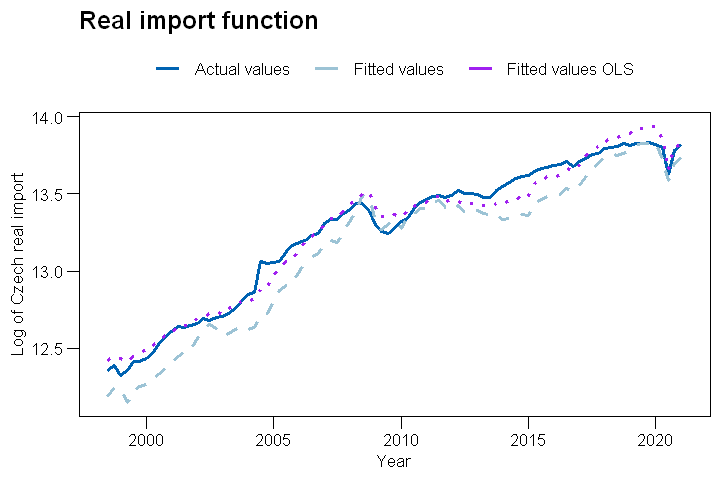

In [49]:
# Plot of Czech real imports and fitted values of the regression models
# The fitted values of the long run regression
data$L_NA_R_M_SA_fitted = -10.748044 + 1.985192*data$L_R_GDP_SA -  1.057715*data$L_ER_R_CPI
data$L_NA_R_M_SA_fitted_ols = -18.3714225477267 + 2.3609959013236*data$L_R_GDP_SA - 0.300415817846581*data$L_ER_R_CPI

## set plot size:
options(repr.plot.width=6, repr.plot.height=4)

# Plot of actual and fitted values
ggplot(data=data[,c("Period", "L_NA_R_M_SA", "L_NA_R_M_SA_fitted", "L_NA_R_M_SA_fitted_ols")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c("#0063B2FF", "#9CC3D5FF", "purple"))+
  geom_line(size=1.1, aes(color = "Actual values", y = L_NA_R_M_SA))+
  geom_line(size=1.1, aes(color = "Fitted values", y = L_NA_R_M_SA_fitted), linetype = "dashed")+
  geom_line(size=1.1, aes(color = "Fitted values OLS", y = L_NA_R_M_SA_fitted_ols), linetype = "dotted")+
  xlab("Year")+
  ylab("Log of Czech real import")+
  ggtitle("Real import function")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "top",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "")



# Residual diagnosis

In [47]:
# The null hypothesis: No serial correlation up to lag 4
# The results indicate no serial correlation up to lag 4. The null hypothesis is not rejected at 5% significance level.
# When applied at higher lags, the results show autocorrelation at lags 8 and higher.
# It is assumed that the model is correctly specified. The autocorrelation at high order lags cannot be removed by selecting 
# a higher order model. 


# # Multivariate LM test for serial correlation
serial.test(vec2var(jcointt), lags.bg = 1, type = c("BG") )$serial
serial.test(vec2var(jcointt), lags.bg = 2, type = c("BG") )$serial
serial.test(vec2var(jcointt), lags.bg = 3, type = c("BG") )$serial
serial.test(vec2var(jcointt), lags.bg = 4, type = c("BG") )$serial


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt)
Chi-squared = 11.54, df = 9, p-value = 0.2405



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt)
Chi-squared = 18.322, df = 18, p-value = 0.4346



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt)
Chi-squared = 26.197, df = 27, p-value = 0.5077



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt)
Chi-squared = 35.59, df = 36, p-value = 0.4879


In [48]:
# Multivariate normality test
# The null hypothesis: The error term is has multivariate normal distribution
# The results indicate non-normal distribution of the error term. The null hypothesis is rejected at 5% significance level.
normality.test(vec2var(jcointt))$jb.mul$JB


	JB-Test (multivariate)

data:  Residuals of VAR object vec2var(jcointt)
Chi-squared = 12.779, df = 6, p-value = 0.04669


###   Real export function

The real export function is estimated firstly using the Johansen approach and secondly using the Engle-Granger approach
The endogenous variables are:
1. Czech real exports (in 2015 prices), L_NA_R_M_SA
2. Eurozone real imports (in 2015 prices), L_NA_R_M_EUROZONE_SA and
3. CPI deflated real exchange rate, L_ER_R_CPI

All varialbes are expressed in logarithms. L_NA_R_M_SA and L_R_GDP_SA were seasonally adjusted in the data preparation step.

The exogenous variables are the dummy variables used to account for exogenous shocks: 
- the COVID periods (2020Q2, D_2020Q3), the Global Financial Crisis (2008Q4, 2009Q1) and 2004Q2 accounts for the accession of the Czech Republic to the European Union (May 2004) that meant a sharp rise of exports and imports

In [58]:
# First, the VAR for the variables in levels is run in order to choose the order of the VEC model.

# The information criteria suggest using 1-9 lags in the VARX (VAR with exogenous variables) model.
# The VEC model has the number of lags in VAR model minus one.
# Howver, the chosen VEC model has 1 lag. 
# R function ca.jo does not allow choosing 0 lags in VEC specification

VARselect(data[,c("L_NA_R_X_SA", "L_NA_R_M_EUROZONE_SA", "L_ER_R_CPI")], lag.max = 10, type = "const",
          exogen = dumvars[,c("D_2004Q2", "D_2020Q2", "D_2020Q3", "D_2008Q4", "D_2009Q1")])

,1,2,3,4,5,6,7,8,9,10
AIC(n),-2.353917e+01,-2.343118e+01,-2.340278e+01,-2.329608e+01,-2.350974e+01,-2.341679e+01,-2.339473e+01,-2.324995e+01,-2.363530e+01,-2.356947e+01
HQ(n),-2.321894e+01,-2.300421e+01,-2.286907e+01,-2.265563e+01,-2.276254e+01,-2.256284e+01,-2.243404e+01,-2.218252e+01,-2.246113e+01,-2.228855e+01
SC(n),-2.274102e+01,-2.236698e+01,-2.207253e+01,-2.169978e+01,-2.164739e+01,-2.128839e+01,-2.100028e+01,-2.058945e+01,-2.070876e+01,-2.037687e+01
FPE(n),6.001611e-11,6.711679e-11,6.949187e-11,7.806632e-11,6.391890e-11,7.146335e-11,7.486857e-11,8.929671e-11,6.319750e-11,7.091078e-11


In [47]:
# The Johansen procedure, including test for cointegration and VECM estimation
# The trace statistic indicates the presence of one cointegration vector.

# The null hypothesis is that there are at most x (x = 0,1,2) cointegration vectors
# the row with hypothesis r, the number of cointegrating vectors  = 0 has the test statistic 60.15,
# higher than the critical value on 5pct significance level of 34.91 so that the null of no cointegration is rejected

jcointt2 = ca.jo(data[,c("L_NA_R_X_SA", "L_NA_R_M_EUROZONE_SA", "L_ER_R_CPI")], ecdet="const",type="trace",K=2,spec="transitory", dumvar = dumvars[,c("D_2004Q2", "D_2020Q2", "D_2020Q3", "D_2008Q4", "D_2009Q1")])
summary(jcointt2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 4.265007e-01 7.844340e-02 3.745971e-02 4.956377e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.40  7.52  9.24 12.97
r <= 1 | 10.67 17.85 19.96 24.60
r = 0  | 60.15 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                        L_NA_R_X_SA.l1 L_NA_R_M_EUROZONE_SA.l1 L_ER_R_CPI.l1
L_NA_R_X_SA.l1                1.000000               1.0000000     1.0000000
L_NA_R_M_EUROZONE_SA.l1      -1.768015              -0.9021428    -2.3903601
L_ER_R_CPI.l1                 1.435043               2.1251926    -0.1643433
constant                      6.379082              -8.1090963    19.9881851
                          constant
L_NA_R_X_SA.l1           1.0000000
L_NA_R_M_EUROZONE_SA.l1 -0.3925461
L_ER_

In [59]:
# Engle - Granger approach
# static OLS regression
ols_export = lm(L_NA_R_X_SA ~ L_NA_R_M_EUROZONE_SA + L_ER_R_CPI, data = data)
coef(ols_export)

(Intercept) L_NA_R_M_EUROZONE_SA           L_ER_R_CPI 
          -5.8894253            1.6310956           -0.9423845

In [60]:
# Choose optimal lag for ADF test on static regression residuals
# The optimal lag selection for the ADF test is zero

lagopt_export <- lag_length_opt_SC( resid(ols_export), lag.max = 10)
lagopt_export

lag 
  0

In [63]:
# Engle-Grangewr cointegration test
# 1 lag was chosen for the test because R function coint.test does not allow to select zero lags
# The ADF statistic is equal to -2.59 and the null hypothesis of no cointegration is not rejected on 5% confidence level


coint.test(y =  data$L_NA_R_X_SA, X = as.matrix(data[,c("L_NA_R_M_EUROZONE_SA", "L_ER_R_CPI")]), d = 0, nlag = 1, output = TRUE)

Response: data$L_NA_R_X_SA 
Input: as.matrix(data[, c("L_NA_R_M_EUROZONE_SA", "L_ER_R_CPI")]) 
Number of inputs: 2 
Model: y ~ X + 1 
------------------------------- 
Engle-Granger Cointegration Test 
alternative: cointegrated 

Type 1: no trend 
    lag      EG p.value 
   1.00   -2.59    0.10 
----- 
 Type 2: linear trend 
    lag      EG p.value 
 1.0000  0.0958  0.1000 
----- 
 Type 3: quadratic trend 
    lag      EG p.value 
  1.000   0.503   0.100 
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


# The results

In [49]:
# The result are not as expected:
# L_NA_R_X_SA = -6.379082 + 1.768015*L_NA_R_M_EUROZONE_SA  -1.435043*L_ER_R_CPI
# using the Johansen approach and
# L_NA_R_X_SA = -5.88942530288994 + 1.63109557068303*L_NA_R_M_EUROZONE_SA -0.942384460903691*L_ER_R_CPI
# using the Engle-Granger approach

# The results imply, that the Marshall-Lerner condition does not hold, real depreciation does not improve net exports
# Rather, the model implies that real depreciation worsens real exports
# Multivariate LM test for serial correlation
# Null hypothesis of no serial correlation is rejected. Choosing higher order model does not improve the BG test result
serial.test(vec2var(jcointt2), lags.bg = 1, type = c("BG") )$serial
serial.test(vec2var(jcointt2), lags.bg = 2, type = c("BG") )$serial
serial.test(vec2var(jcointt2), lags.bg = 3, type = c("BG") )$serial
serial.test(vec2var(jcointt2), lags.bg = 4, type = c("BG") )$serial

# The FEER model is still estimated. 
# However, since the economic and statistical assumptions are violated, the results should be interpreted with caution.
# OLS estimates are preffered even though the test suggests there is no cointegration in the export function. 
# The Engle-Granger test has weak power if the loading coefficient in the ECM is low in absolute value.
# The Johansen method estimates rejected normal error term in the import function and no autocorrelation in the export function.


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 17.723, df = 9, p-value = 0.03853



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 24.993, df = 18, p-value = 0.1251



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 37.751, df = 27, p-value = 0.08189



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 55.329, df = 36, p-value = 0.0207


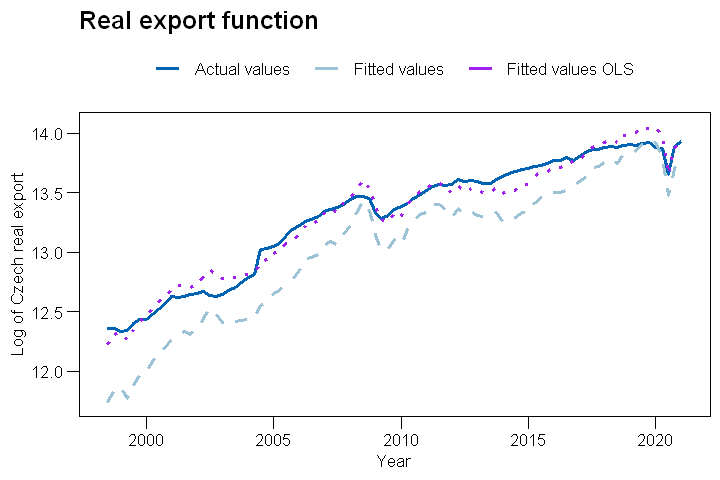

In [72]:
# Plot of Czech real exports and fitted values of the regression models
# The fitted values of the long run regression

data$L_NA_R_X_SA_fitted = -6.379082 + 1.768015*data$L_NA_R_M_EUROZONE_SA  -1.435043 *data$L_ER_R_CPI
data$L_NA_R_X_SA_fitted_ols = -5.88942530288994 + 1.63109557068303*data$L_NA_R_M_EUROZONE_SA -0.942384460903691*data$L_ER_R_CPI
## set plot size:
## options(repr.plot.width=6, repr.plot.height=4)

# Plot of actual and fitted values
ggplot(data=data[,c("Period", "L_NA_R_X_SA", "L_NA_R_X_SA_fitted", "L_NA_R_X_SA_fitted_ols")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c("#0063B2FF", "#9CC3D5FF", "purple"))+
  geom_line(size=1.1, aes(color = "Actual values", y = L_NA_R_X_SA))+
  geom_line(size=1.1, aes(color = "Fitted values", y = L_NA_R_X_SA_fitted), linetype = "dashed")+
  geom_line(size=1.1, aes(color = "Fitted values OLS", y = data$L_NA_R_X_SA_fitted_ols), linetype = "dotted")+
  xlab("Year")+
  ylab("Log of Czech real export")+
  ggtitle("Real export function")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "top",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "")



# Residual diagnosis

In [50]:
# The null hypothesis: No serial correlation up to lag 4
# The results indicate no serial correlation up to lag 4. The null hypothesis rejected at 5% significance level.
# Autocorrelation of the error term couldn´t be eliminated by choosing a higher order model
# It is assumed that the model is correctly specified. The autocorrelation at high order lags cannot be removed by selecting 
# a higher order model. 
# Moreover, the result can be attributed to random error when testing multiple hypothesis about different lags.
# The joint confidence level of multiple hypothesis tests is lower than 95% when 5% significance level is used for individual test. 

# The results in Eviews software, which uses Edgeworth expansion corrected likelihood ratio statistic,
# indicate no serial correlation at higher lags.

# # Multivariate LM test for serial correlation
serial.test(vec2var(jcointt2), lags.bg = 1, type = c("BG") )$serial
serial.test(vec2var(jcointt2), lags.bg = 2, type = c("BG") )$serial
serial.test(vec2var(jcointt2), lags.bg = 3, type = c("BG") )$serial
serial.test(vec2var(jcointt2), lags.bg = 4, type = c("BG") )$serial


	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 17.723, df = 9, p-value = 0.03853



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 24.993, df = 18, p-value = 0.1251



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 37.751, df = 27, p-value = 0.08189



	Breusch-Godfrey LM test

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 55.329, df = 36, p-value = 0.0207


In [192]:
# Multivariate normality test
# The null hypothesis: The error term is has multivariate normal distribution
# The results indicate normal distribution of the error term. The null hypothesis is not rejected at 5% significance level.
normality.test(vec2var(jcointt2))$jb.mul$JB


	JB-Test (multivariate)

data:  Residuals of VAR object vec2var(jcointt2)
Chi-squared = 10.496, df = 6, p-value = 0.1053


# Sustainable current account function

The sustainable current account function represents the expected current account conditional on the stage of development of the country (calculated using the relative GDP per capita variable). In line wit the theory, the model suggests that -5% was a sustainable level in the late 1990´s transitive Czech economy and is zero in the posttransitive stage of the economy in 2020.

In [11]:
# The sustainable current account to gdp ratio is estimated using Engle-Granger approach
# Fit an OLS regression
ols_cab_sus = lm(BOP_CAB_GDP_ratio_SA ~ CONV, data = data)
coef(ols_cab_sus) 

(Intercept)        CONV 
  -19.06117    22.98825

In [12]:
# Choose optimal lag for ADF test on static regression residuals
# The optimal lag selection for the ADF test is zero

lagopt_cab_sus <- lag_length_opt_SC( resid(ols_cab_sus), lag.max = 11)
lagopt_cab_sus

lag 
  0

In [13]:
# The Engle-Granger cointegration test is performed using 1 lag since the function does not allow zero lags as recommended by
# lag_length_opt_SC function

# The test statistic is -7.08 and the null hypothesis of no cointegration is rejected

coint.test(y =  data$BOP_CAB_GDP_ratio_SA, X = data$CONV, d = 0, nlag = 1, output = TRUE)

Response: data$BOP_CAB_GDP_ratio_SA 
Input: data$CONV 
Number of inputs: 1 
Model: y ~ X + 1 
------------------------------- 
Engle-Granger Cointegration Test 
alternative: cointegrated 

Type 1: no trend 
    lag      EG p.value 
   1.00   -7.08    0.01 
----- 
 Type 2: linear trend 
    lag      EG p.value 
  1.000   0.305   0.100 
----- 
 Type 3: quadratic trend 
    lag      EG p.value 
   1.00   -2.55    0.10 
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


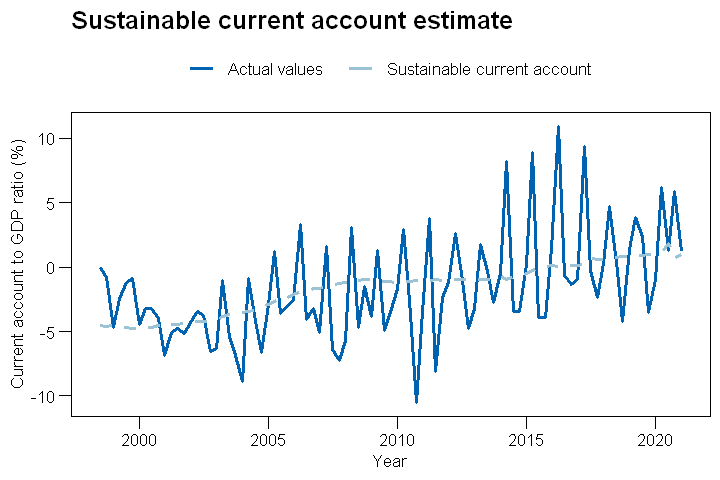

In [44]:
# Plot of the fitted values of the regression and the raw data
# The fitted values of the long run regression
data$BOP_CAB_GDP_ratio_fitted = -0.190611737108801   + 0.229882481072368*data$CONV
## set plot size:
options(repr.plot.width=6, repr.plot.height=4)

# Plot of actual and fitted values
ggplot(data=data[,c("Period", "BOP_CAB_GDP_ratio_fitted", "BOP_CAB_GDP_ratio")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c("#0063B2FF", "#9CC3D5FF", "purple"))+
  geom_line(size=1.1, aes(color = "Actual values", y = BOP_CAB_GDP_ratio*100))+
  geom_line(size=1.1, aes(color = "Sustainable current account", y = BOP_CAB_GDP_ratio_fitted*100), linetype = "dashed")+
  xlab("Year")+
  ylab("Current account to GDP ratio (%)")+
  ggtitle("Sustainable current account estimate")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "top",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "")



# FEER calculation

The FEER is the exchange rate that satisfies that the modelled current account
- is equal to the sustainable current account
when imposing the internal balance condition, ie
- variables being at their equilibrium (trend) values

RGDP_POT being the Czech potential GDP, NA_R_M_EUROZONE_HP being the HP-filtered EUROZONE real import,
BOP_BPI_HP (BOP_BSI_HP) the HP-filtered balance of primary (secondary) income

The FEER is estimated using the interval halving method
The method finds such FEER that the "calculateCAB_CAB_sust_diff" function returns zero.
The "calculateCAB_CAB_sust_diff" function calculates the difference between 
the modelled current account balance (using the estimated coefficients) and the sustainable level.
The result is stored into variable "FEER".

In [45]:
# Import intercept
im_interc <<- -18.3714225477269

# Export intercept
ex_interc <<- -5.88942530288993

# Import elasticity to the real exchagne rate
im_ER_R <<- -0.300415817846556

# Export elasticity to the real exchagne rate
ex_ER_R <<- -0.942384460903692
#ex_ER_R = 1
# Import elasticity to domestic product
im_Y_D <<- 2.36099590132361

# Export elasticity to foreign demand
ex_Y_F <<- 1.63109557068303

#L_FEER = log(100)
data$FEER = rep(NA, nrow(data))

calculateCAB <- function(L_FEER){
CAB_gdp_ratio = (exp(ex_interc + ex_ER_R*L_FEER + ex_Y_F*log(Y_F_eq))*P_X  - exp(im_interc + im_ER_R*L_FEER + im_Y_D*log(Y_D_eq))*P_M
+ BPI_eq + BSI_eq)/N_GDP
return(CAB_gdp_ratio) 
} 

calculateCAB_CAB_sust_diff <- function(L_FEER){
CAB_gdp_ratio = (exp(ex_interc + ex_ER_R*L_FEER + ex_Y_F*log(Y_F_eq))*P_X  - exp(im_interc + im_ER_R*L_FEER + im_Y_D*log(Y_D_eq))*P_M
+ BPI_eq + BSI_eq)/N_GDP
return(CAB_gdp_ratio - CAB_gdp_ratio_sust) 
} 
    
for (i in 1:nrow(data)){
Y_D_eq <<- unlist(data[i,"RGDP_POT"])
Y_F_eq <<- unlist(data[i,"NA_R_M_EUROZONE_HP"])
BPI_eq <<- unlist(data[i,"BOP_BPI_HP"])
BSI_eq <<- unlist(data[i,"BOP_BSI_HP"])
CAB_gdp_ratio_sust <<- unlist(data[i,"BOP_CAB_GDP_ratio_fitted"])
N_GDP <<- unlist(data[i,"N_GDP"])
P_X <<- unlist(data[i,"P_X"])
P_M <<- unlist(data[i,"P_M"])


#calculate the FEER using the method of halving intervals
data[i,"FEER"] = exp(uniroot(calculateCAB_CAB_sust_diff, lower = 2, upper = 10, maxiter=400, check.conv=TRUE)$root)*data[i,"CPI_CZ"]/data[i,"CPI_EUROZONE"]
    
}

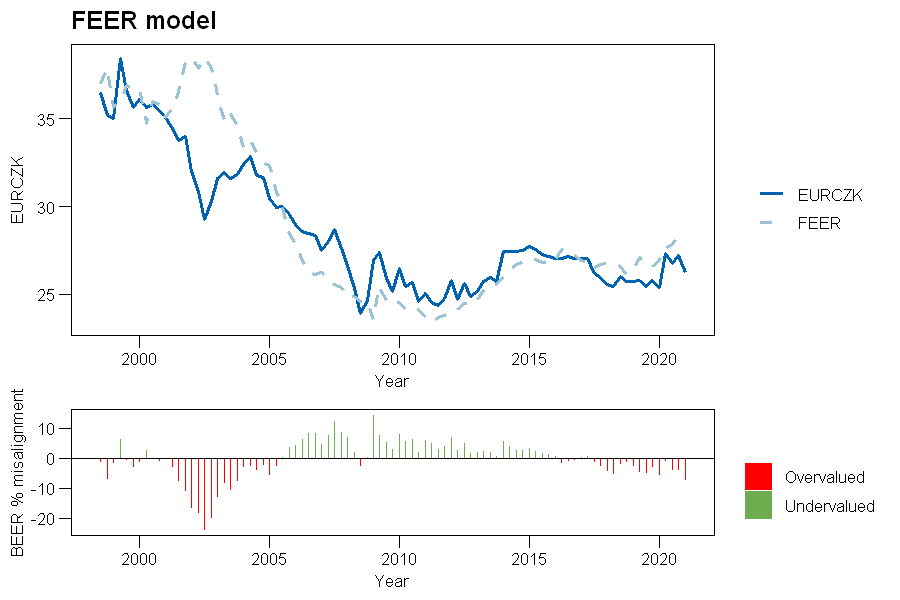

In [46]:
# Plot the FEER model results

# The % difference between the actual EURCZK and the FEER
data$FEER_misalignment = (data$EURCZK/data$FEER-1)*100
data$FEER_misalignment_sign = ifelse(data$FEER_misalignment < 0, "Overvalued", "Undervalued")
## set plot size:
options(repr.plot.width=7.5, repr.plot.height=5)

# Plot of actual and fitted values
plot1 = ggplot(data=data[,c("Period", "EURCZK", "FEER", "FEER_misalignment", "FEER_misalignment_sign")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c("#0063B2FF", "#9CC3D5FF"))+
 scale_linetype_manual(values = c( "solid","dashed"))+
  geom_line(size=1.1, aes(color = "EURCZK", y = EURCZK, linetype="EURCZK"))+
  geom_line(size=1.1, aes(color = "FEER", y = FEER, linetype="FEER"))+
  xlab("Year")+
  ylab("EURCZK")+
  ggtitle("FEER model")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "right",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "", linetype = "")

plot2 = ggplot(data=data[,c("Period", "FEER_misalignment", "FEER_misalignment_sign")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c( "#FE0000FF", "#6DAC4FFF"))+
 scale_fill_manual(values = c("#FE0000FF", "#6DAC4FFF"))+
 #guides(color = guide_legend(reverse = TRUE))+
geom_bar(aes(y = FEER_misalignment, colour = FEER_misalignment_sign, fill = FEER_misalignment_sign) , width=.8, stat="identity") + 
 geom_hline(yintercept=0)+
#geom_line(size=1.1, aes(color = "EURCZK_misalignment", y = EURCZK_misalignment))+
  xlab("Year")+
  ylab("BEER % misalignment")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "right",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "", fill="")

plot_grid(plot1, plot2, align = "v", nrow = 2, rel_heights = c(2/3, 1/3))


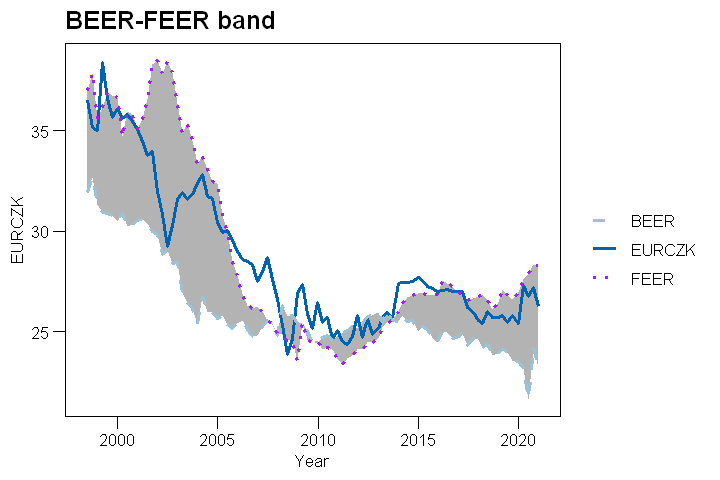

In [336]:
# Plot of BEER and FEER results together
data$EURCZK_fitted = exp(2.201301 - 1.508029*data$L_DPROD - 0.6099616*data$L_GOV_GDP_ratio_SA)*data$CPI_CZ/data$CPI_EUROZONE
data$EURCZK_fitted_permanent = exp(2.201301 - 1.508029*log(data$DPROD_HP) - 0.6099616*log(data$GOV_GDP_ratio_SA_HP))*data$CPI_CZ/data$CPI_EUROZONE
data$EURCZK_misalignment = (data$EURCZK/data$EURCZK_fitted-1)*100
data$misalignment_sign = ifelse(data$EURCZK_misalignment < 0, "Overvalued", "Undervalued")
## set plot size:
options(repr.plot.width=6, repr.plot.height=4)

# Plot of actual and fitted values
plot1 = ggplot(data=data[,c("Period", "EURCZK", "EURCZK_fitted", "FEER")],
       aes(x=Period)) +
  theme_base()+
  scale_color_manual(values=c( "#9CC3D5FF", "#0063B2FF", "purple"))+
 scale_linetype_manual(values = c( "dashed", "solid", "dotted"))+
geom_ribbon(aes(ymin = EURCZK_fitted, ymax = FEER), fill = "grey70") +
  geom_line(size=1.1, aes(color = "EURCZK", y = EURCZK, linetype="EURCZK"))+
  geom_line(size=1.1, aes(color = "BEER", y = EURCZK_fitted, linetype="BEER"))+
  geom_line(size=1.1, aes(color = "FEER", y = FEER, linetype="FEER"))+
  
  xlab("Year")+
  ylab("EURCZK")+
  ggtitle("BEER-FEER band")+
  theme(axis.title.x = element_text(size=10, colour="black"),
        axis.title.y = element_text(size=10, colour="black"),
        axis.text.x = element_text(size=10, colour="black"),
        axis.text.y = element_text(size=10, colour="black"),
        legend.title = element_text(size=15, colour="black"),
        legend.text = element_text(size=10, colour="black"),
        plot.title = element_text(size=15, colour="black"),
        legend.position = "right",
        plot.background = element_rect(
          fill = "white",
          colour = "white",
          size = 1
        ),
        panel.background = element_rect(fill = "white", colour = "grey50"),
        strip.background = element_rect(colour = "black", fill = "white"),
        strip.text.x = element_text(colour = "black", face = "bold", size = 15)
  )+
  labs(color = "", linetype = "")

plot1
